<a href="https://colab.research.google.com/github/David-02480/Python-Data-Analysis/blob/main/Superstore_Data_Analytics_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Mounted at /content/drive


# IMPORTACIÓN DE LOS DATOS

In [ ]:
path = r'/content/drive/MyDrive/MODULO_5_DA2/datasets/superstore'
files = os.listdir(path)
superstore = pd.DataFrame()
files

['superstore_dataset2011-2015-8.csv',
 'superstore_dataset2011-2015-5.csv',
 'superstore_dataset2011-2015-4.csv',
 'superstore_dataset2011-2015-3.csv',
 'superstore_dataset2011-2015-2.csv',
 'superstore_dataset2011-2015-1.csv']

In [ ]:
for file in files:
  if file.endswith('.csv'):
    try:
      df_temp = pd.read_csv(path + '/' + file, encoding='utf-8')
    except UnicodeDecodeError:
      df_temp = pd.read_csv(path + '/' + file, encoding='latin1')
    df_temp['file_name'] = file
    superstore = pd.concat([superstore, df_temp],ignore_index=True)

# LIMPIEZA DE LOS DATOS

In [ ]:
pd.set_option('display.max_columns', None)
superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,file_name
0,7694,MX-2011-157049,13-06-2011,13-06-2011,Same Day,BD-11560,Brendan Dodson,Home Office,Cuajimalpa,Distrito Federal,Mexico,NaN,LATAM,North,TEC-CO-10003964,Technology,Copiers,"Canon Fax Machine, High-Speed",631.91364,3,0.002,87.35364,78.28,Critical,superstore_dataset2011-2015-8.csv
1,15772,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,France,NaN,EU,Central,FUR-BO-10000847,Furniture,Bookcases,"Dania Stackable Bookrack, Mobile",437.72400,4,0.100,165.32400,68.34,High,superstore_dataset2011-2015-8.csv
2,10075,US-2011-102288,13-06-2011,17-06-2011,Standard Class,KT-16465,Kean Takahito,Consumer,Presidente Dutra,Maranhão,Brazil,NaN,LATAM,South,FUR-CH-10004801,Furniture,Chairs,"Office Star Bag Chairs, Set of Two",215.37600,14,0.600,-231.78400,39.85,High,superstore_dataset2011-2015-8.csv
3,15771,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,France,NaN,EU,Central,FUR-BO-10000895,Furniture,Bookcases,"Sauder Corner Shelving, Metal",264.16800,2,0.100,55.72800,30.14,High,superstore_dataset2011-2015-8.csv
4,27155,IN-2011-51390,13-06-2011,17-06-2011,Standard Class,RB-19705,Roger Barcio,Home Office,Palembang,Sumatera Selatan,Indonesia,NaN,APAC,Southeast Asia,FUR-CH-10000660,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",332.52960,1,0.270,18.21960,30.14,Medium,superstore_dataset2011-2015-8.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61545,38172,US-2013-121013,6/9/2013,11/9/2013,Standard Class,MM-17920,Michael Moore,Consumer,Chesapeake,Virginia,United States,23320.0,US,South,OFF-LA-10004545,Office Supplies,Labels,Avery 50,25.06000,2,0.000,11.77820,3.26,High,superstore_dataset2011-2015-1.csv
61546,1431,MX-2013-107097,6/9/2013,11/9/2013,Standard Class,TC-21145,Theresa Coyne,Corporate,Bucaramanga,Santander,Colombia,NaN,LATAM,South,OFF-EN-10002855,Office Supplies,Envelopes,"Kraft Interoffice Envelope, Security-Tint",65.76000,2,0.000,29.56000,3.18,Medium,superstore_dataset2011-2015-1.csv
61547,38846,CA-2013-136595,6/9/2013,8/9/2013,First Class,EM-13825,Elizabeth Moffitt,Corporate,Houston,Texas,United States,77036.0,US,Central,FUR-FU-10004671,Furniture,Furnishings,"Executive Impressions 12"" Wall Clock",21.20400,3,0.600,-11.66220,3.16,High,superstore_dataset2011-2015-1.csv
61548,36679,CA-2013-149195,6/9/2013,8/9/2013,Second Class,DM-13525,Don Miller,Corporate,Houston,Texas,United States,77070.0,US,Central,OFF-FA-10001843,Office Supplies,Fasteners,Staples,15.80800,8,0.200,5.33520,2.97,High,superstore_dataset2011-2015-1.csv


In [ ]:
superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'file_name'],
      dtype='object')

## Conociendo los datos

In [ ]:
superstore['Order Priority'].unique()

array(['Critical', 'High', 'Medium', 'Low'], dtype=object)

In [ ]:
superstore['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [ ]:
superstore['Sub-Category'].unique()

array(['Copiers', 'Bookcases', 'Chairs', 'Storage', 'Fasteners',
       'Binders', 'Paper', 'Accessories', 'Art', 'Envelopes',
       'Furnishings', 'Labels', 'Appliances', 'Phones', 'Supplies',
       'Machines', 'Tables'], dtype=object)

In [ ]:
superstore['Market'].unique()

array(['LATAM', 'EU', 'APAC', 'Africa', 'EMEA', 'US', 'Canada'],
      dtype=object)

In [ ]:
superstore['Segment'].unique()

array(['Home Office', 'Corporate', 'Consumer'], dtype=object)

In [ ]:
superstore['Ship Mode'].unique()

array(['Same Day', 'Standard Class', 'First Class', 'Second Class'],
      dtype=object)

In [ ]:
superstore['City'].nunique()

3636

In [ ]:
superstore['State'].nunique()

1094

In [ ]:
superstore['Country'].nunique()

147

In [ ]:
superstore['Region'].unique()

array(['North', 'Central', 'South', 'Southeast Asia', 'Central Asia',
       'Caribbean', 'Africa', 'EMEA', 'West', 'Oceania', 'North Asia',
       'East', 'Canada'], dtype=object)

In [ ]:
superstore['Order Date'].nunique()

1430

In [ ]:
superstore.isnull().sum() #49651 valores nulos encontrados en 'Postal Code'

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       49651
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
file_name             0
dtype: int64

In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          61550 non-null  int64  
 1   Order ID        61550 non-null  object 
 2   Order Date      61550 non-null  object 
 3   Ship Date       61550 non-null  object 
 4   Ship Mode       61550 non-null  object 
 5   Customer ID     61550 non-null  object 
 6   Customer Name   61550 non-null  object 
 7   Segment         61550 non-null  object 
 8   City            61550 non-null  object 
 9   State           61550 non-null  object 
 10  Country         61550 non-null  object 
 11  Postal Code     11899 non-null  float64
 12  Market          61550 non-null  object 
 13  Region          61550 non-null  object 
 14  Product ID      61550 non-null  object 
 15  Category        61550 non-null  object 
 16  Sub-Category    61550 non-null  object 
 17  Product Name    61550 non-null 

In [ ]:
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,61550.000000,11899.000000,61550.000000,61550.000000,61550.000000,61550.000000,61550.000000
mean,25609.792851,55128.031599,248.323138,3.482924,0.143001,28.714501,26.616875
std,14813.424323,32085.202363,498.100427,2.281280,0.212477,175.320805,58.027798
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12802.250000,22801.000000,30.930000,2.000000,0.000000,0.000000,2.620000
50%,25552.500000,57103.000000,85.320000,3.000000,0.000000,9.180000,7.810000
75%,38468.750000,90008.000000,251.959000,5.000000,0.200000,36.810000,24.637500
max,51290.000000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


## Limpiando Fechas

In [ ]:
superstore['Order Date']

0        13-06-2011
1        13-06-2011
2        13-06-2011
3        13-06-2011
4        13-06-2011
            ...    
61545      6/9/2013
61546      6/9/2013
61547      6/9/2013
61548      6/9/2013
61549      6/9/2013
Name: Order Date, Length: 61550, dtype: object

In [ ]:
superstore['Ship Date']

0        13-06-2011
1        18-06-2011
2        17-06-2011
3        18-06-2011
4        17-06-2011
            ...    
61545     11/9/2013
61546     11/9/2013
61547      8/9/2013
61548      8/9/2013
61549      8/9/2013
Name: Ship Date, Length: 61550, dtype: object

In [ ]:
superstore['Order Date'] = superstore['Order Date'].apply(
    lambda x: x.replace('/','-')
)

In [ ]:
superstore['Ship Date'] = superstore['Ship Date'].apply(
    lambda x: x.replace('/','-')
)

In [ ]:
superstore['Order Date'] = superstore['Order Date'].apply(
    lambda x: pd.to_datetime(x,format= '%d-%m-%Y', errors = 'coerce')
)

In [ ]:
superstore['Ship Date'] = superstore['Ship Date'].apply(
    lambda x: pd.to_datetime(x,format= '%d-%m-%Y', errors = 'coerce')
)

In [ ]:
superstore['Order Date']

0       2011-06-13
1       2011-06-13
2       2011-06-13
3       2011-06-13
4       2011-06-13
           ...    
61545   2013-09-06
61546   2013-09-06
61547   2013-09-06
61548   2013-09-06
61549   2013-09-06
Name: Order Date, Length: 61550, dtype: datetime64[ns]

In [ ]:
superstore['Ship Date']

0       2011-06-13
1       2011-06-18
2       2011-06-17
3       2011-06-18
4       2011-06-17
           ...    
61545   2013-09-11
61546   2013-09-11
61547   2013-09-08
61548   2013-09-08
61549   2013-09-08
Name: Ship Date, Length: 61550, dtype: datetime64[ns]

In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          61550 non-null  int64         
 1   Order ID        61550 non-null  object        
 2   Order Date      61550 non-null  datetime64[ns]
 3   Ship Date       61550 non-null  datetime64[ns]
 4   Ship Mode       61550 non-null  object        
 5   Customer ID     61550 non-null  object        
 6   Customer Name   61550 non-null  object        
 7   Segment         61550 non-null  object        
 8   City            61550 non-null  object        
 9   State           61550 non-null  object        
 10  Country         61550 non-null  object        
 11  Postal Code     11899 non-null  float64       
 12  Market          61550 non-null  object        
 13  Region          61550 non-null  object        
 14  Product ID      61550 non-null  object        
 15  Ca

## Buscando valores nulos o vacios

Dado que 'Postal Code' cuenta con 49651 valores null o NaN, de 61550 entradas, solamente contamos con 11,899 valores non-null.

11,899 equivale al 19.3% del total de los datos.

In [ ]:
superstore['Postal Code']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
61545    23320.0
61546        NaN
61547    77036.0
61548    77070.0
61549    37604.0
Name: Postal Code, Length: 61550, dtype: float64

In [ ]:
superstore['Postal Code'].isna() # True=[Nan,Null] False=non-null

0         True
1         True
2         True
3         True
4         True
         ...  
61545    False
61546     True
61547    False
61548    False
61549    False
Name: Postal Code, Length: 61550, dtype: bool

In [ ]:
superstore[superstore['Postal Code'].isna()].groupby(
    ['Country', 'City', 'State', 'Region']
    ).size().reset_index(name='Count').sum()

Country    AfghanistanAfghanistanAfghanistanAfghanistanAl...
City       HeratJalalabadKabulKandaharDurresElbasanKorceS...
State      HiratNangarharKabulKandaharDurrësElbasanKorçëS...
Region     Central AsiaCentral AsiaCentral AsiaCentral As...
Count                                                  49651
dtype: object

In [ ]:
superstore[superstore['Postal Code'].isna()].groupby(['Country']).size().count()

146

In [ ]:
superstore['Country'].nunique()

147

Podemos observar que de 147 Paises incluidos en el dataset, solamente 1 pais contiene valores de 'Postal Code'. ¿Que pais contiene esos valores?

In [ ]:
superstore[superstore['Postal Code'].notna()].groupby(
    ['Country']
    ).size().reset_index(name='Count')

,Country,Count
0,United States,11899


## Limpiando valores nulos o vacios

El 19.3% de nuestros datos corresponden a compras efectuadas en  United States, dado que es un porcentaje a considerar para analisis por lo que conservaré la columna

In [ ]:
superstore['Postal Code'] = superstore['Postal Code'].astype(str)

In [ ]:
superstore['Postal Code'] = superstore['Postal Code'].apply(
    lambda x: x.replace('.0','')
)

In [ ]:
superstore['Postal Code'] = superstore['Postal Code'].apply(
    lambda x: x.replace('nan','Non-Registered')
)

In [ ]:
superstore['Postal Code']

0        Non-Registered
1        Non-Registered
2        Non-Registered
3        Non-Registered
4        Non-Registered
              ...      
61545             23320
61546    Non-Registered
61547             77036
61548             77070
61549             37604
Name: Postal Code, Length: 61550, dtype: object

In [ ]:
superstore['Postal Code'].isna().sum()

0

In [ ]:
superstore.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
file_name         0
dtype: int64

In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          61550 non-null  int64         
 1   Order ID        61550 non-null  object        
 2   Order Date      61550 non-null  datetime64[ns]
 3   Ship Date       61550 non-null  datetime64[ns]
 4   Ship Mode       61550 non-null  object        
 5   Customer ID     61550 non-null  object        
 6   Customer Name   61550 non-null  object        
 7   Segment         61550 non-null  object        
 8   City            61550 non-null  object        
 9   State           61550 non-null  object        
 10  Country         61550 non-null  object        
 11  Postal Code     61550 non-null  object        
 12  Market          61550 non-null  object        
 13  Region          61550 non-null  object        
 14  Product ID      61550 non-null  object        
 15  Ca

# CREANDO CSV LIMPIO

In [ ]:
superstore['file_name'] = superstore['file_name'].apply(
    lambda x: x.replace('.csv', '')
)

In [ ]:
from google.colab import files
superstore.to_csv('superstore_clean.csv', index=False)

files.download('superstore_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EXPLORANDO LA NUEVA BASE DE DATOS LIMPIA


In [ ]:
superstore = pd.read_csv('/content/drive/MyDrive/MODULO_5_DA2/datasets/superstore_clean.csv')

In [ ]:
superstore.describe()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
count,61550.000000,61550.000000,61550.000000,61550.000000,61550.000000,61550.000000
mean,25609.792851,248.323138,3.482924,0.143001,28.714501,26.616875
std,14813.424323,498.100427,2.281280,0.212477,175.320805,58.027798
min,1.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12802.250000,30.930000,2.000000,0.000000,0.000000,2.620000
50%,25552.500000,85.320000,3.000000,0.000000,9.180000,7.810000
75%,38468.750000,251.959000,5.000000,0.200000,36.810000,24.637500
max,51290.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          61550 non-null  int64         
 1   Order ID        61550 non-null  object        
 2   Order Date      61550 non-null  datetime64[ns]
 3   Ship Date       61550 non-null  object        
 4   Ship Mode       61550 non-null  object        
 5   Customer ID     61550 non-null  object        
 6   Customer Name   61550 non-null  object        
 7   Segment         61550 non-null  object        
 8   City            61550 non-null  object        
 9   State           61550 non-null  object        
 10  Country         61550 non-null  object        
 11  Postal Code     61550 non-null  object        
 12  Market          61550 non-null  object        
 13  Region          61550 non-null  object        
 14  Product ID      61550 non-null  object        
 15  Ca

In [ ]:
superstore.columns #'Ship Mode',  'Segment', 'Market',  'Category' - 'Sub-Category'

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'file_name'],
      dtype='object')

## Analizando resumenes

<Axes: xlabel='Ship Mode', ylabel='count'>

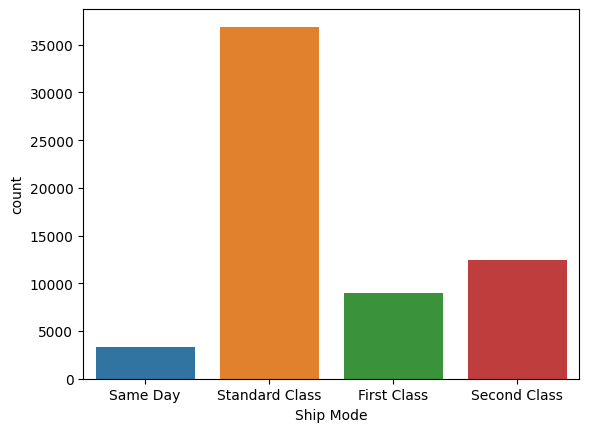

In [ ]:
sns.countplot(x=superstore['Ship Mode'], data=superstore)

<Axes: xlabel='Segment', ylabel='count'>

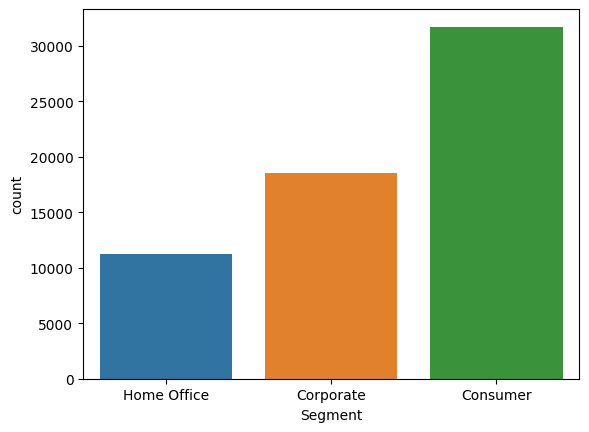

In [ ]:
sns.countplot(x=superstore['Segment'], data=superstore)

<Axes: xlabel='Market', ylabel='count'>

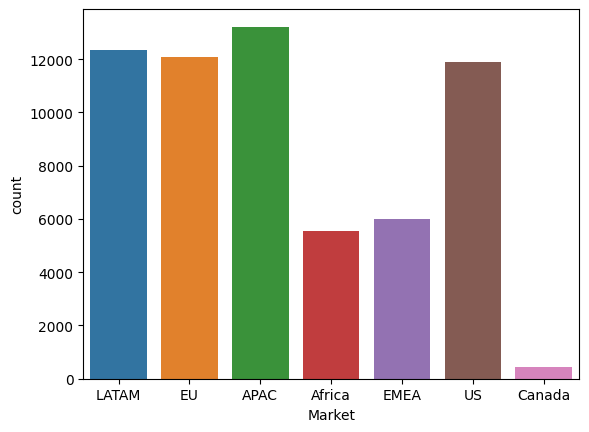

In [ ]:
sns.countplot(x=superstore['Market'], data=superstore)

<Axes: xlabel='Order Priority', ylabel='count'>

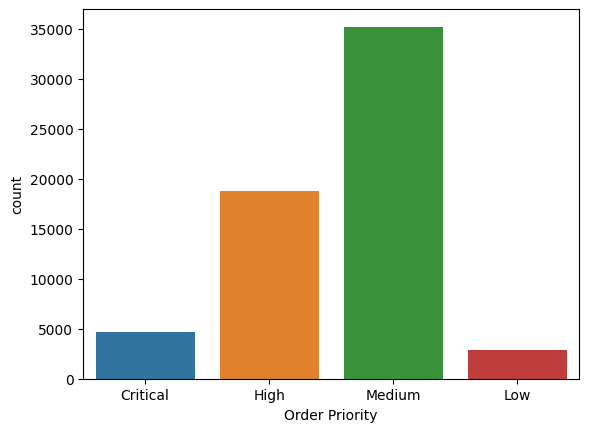

In [ ]:
sns.countplot(x=superstore['Order Priority'], data=superstore)

## Explorando fechas y buscando correlaciones

In [ ]:
superstore.corr()

<ipython-input-23-ba38d1edfe45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  superstore.corr()


,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,-0.044717,-0.176418,0.088367,-0.019221,-0.040431
Sales,-0.044717,1.000000,0.310065,-0.085059,0.477909,0.763810
Quantity,-0.176418,0.310065,1.000000,-0.019665,0.104758,0.273606
Discount,0.088367,-0.085059,-0.019665,1.000000,-0.315350,-0.079454
Profit,-0.019221,0.477909,0.104758,-0.315350,1.000000,0.366550
Shipping Cost,-0.040431,0.763810,0.273606,-0.079454,0.366550,1.000000


<ipython-input-22-b5355928ff26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(superstore.corr(), vmin=-1, vmax=1, annot = True)


<Axes: >

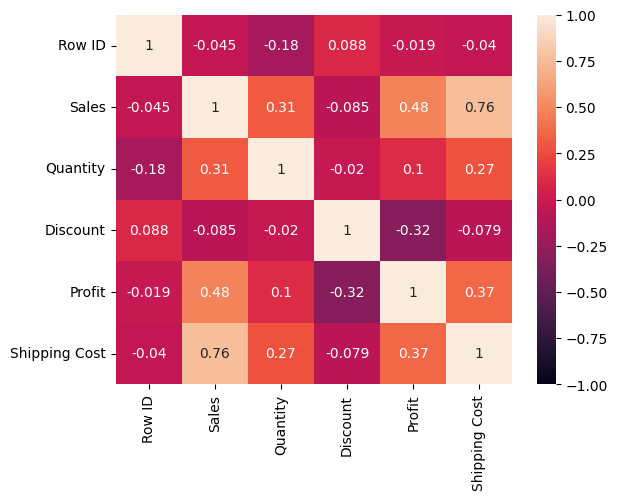

In [ ]:
sns.heatmap(superstore.corr(), vmin=-1, vmax=1, annot = True)

La variable Sales muestra una correlación positiva con la variable Shipping Cost. Indicando que cuando una aumenta, la otra tambien tiende a aumentar

De la misma manera Profit muestra una correlación relativamente alta con Shipping Cost

Sales tambien muestra una correlación relativamente alta con Profit, entre mas alto sean las ventas, mas alto sera el beneficio

Discount muestra una correlación negativa con Profit, lo que podriamos interpretar que cuando una variable aumenta la otra disminuye

## Sales vs Shipping Cost

In [ ]:
superstore.groupby('Ship Mode').size().reset_index(name='Count').sort_values('Count',ascending=False)

,Ship Mode,Count
3,Standard Class,36892
2,Second Class,12408
0,First Class,8968
1,Same Day,3282


Podemos notar ima clara preferencia entre El Ship Mode Standard Class

¿Está el costo de envio asociado con esta preferencia?

In [ ]:
superstore.loc[superstore['Ship Mode'] == 'Standard Class', 'Shipping Cost'].describe()

count    36892.000000
mean        20.105321
std         41.955368
min          0.000000
25%          2.180000
50%          6.360000
75%         19.610000
max        878.380000
Name: Shipping Cost, dtype: float64

Podemos notar que El modo de envio Standard Class	tienen una distribucion bastante amplia, desde &#36;0(gratis) hasta &#36;878. Con una desviacion estandar de $41, indicando una alta variación en los costos de envios. Para obtener una comprension mas detallada procedo a analizar año por año. (Ver Seccion: Shipping Cost Analisis anño por año)

In [ ]:
stdclass = superstore.loc[superstore['Ship Mode'] == 'Standard Class'] #36892 rows of 61550
stdclass.groupby('Market').size().reset_index(name='Count').sort_values('Count',ascending = False)

,Market,Count
0,APAC,7998
5,LATAM,7461
4,EU,7287
6,US,7073
3,EMEA,3626
1,Africa,3220
2,Canada,227


Todos los mercados han realizado pedidos por Standard Class, sin embargo cuatro de ellos muestran una clara preferencia por este tipo de envio, lo cual puede atribuirse al bajo costo de este (&#36;)

In [ ]:
stdclass.groupby('Order Priority').size().reset_index(name='Count').sort_values('Count',ascending = False)

,Order Priority,Count
2,Medium,25751
0,High,8254
1,Low,2887


Podemos notar que en los pedidos realizados por Standard Class, ninguno tiene una Order Priority Critical, domina la Order Priority Medium

In [ ]:
superstore.groupby('Order Priority').size().reset_index(name='Count').sort_values('Count',ascending = False)

,Order Priority,Count
3,Medium,35224
1,High,18744
0,Critical,4695
2,Low,2887


En todos los pedidos del dataset tambien domina la Order Priority Medium

In [ ]:
superstore.groupby('Ship Mode')['Profit'].sum().astype(int).reset_index().sort_values('Profit',ascending=False)

,Ship Mode,Profit
3,Standard Class,1069779
2,Second Class,357071
0,First Class,247445
1,Same Day,93081


Los pedidos realizado por Standard Class Presentan beneficios notables en el total de todos los pedidos

In [ ]:
stdclass.groupby('Order Priority')['Profit'].sum().astype(int).reset_index().sort_values('Profit',ascending=False)

,Order Priority,Profit
2,Medium,764547
0,High,234837
1,Low,70394


los pedidos realizados por Standard class, con Order Priority Medium presentan un claro y alto beneficio

In [ ]:
superstore['Discount'].describe()

count    61550.000000
mean         0.143001
std          0.212477
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64

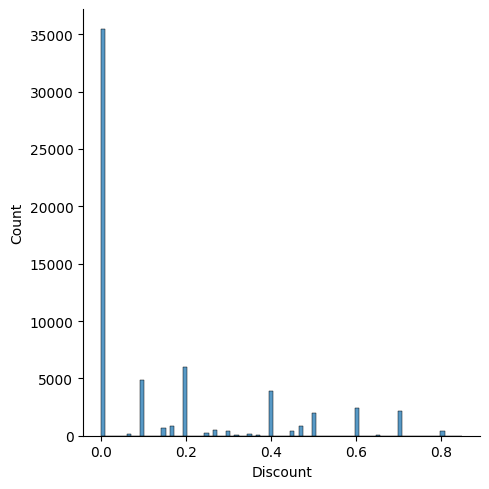

In [ ]:
sns.displot(superstore['Discount'])

La desviacion estandar es de 0.21, indicandonos que los valores de descuento varian considerablemente alrededor de la media (0.143)

El 75% de los pedidos cuentan con un descuento menor al 0.2(20%), confirmandonos que la mayoria de los pedidos tienen descuentos bajos o nulo.

<Axes: ylabel='Count'>

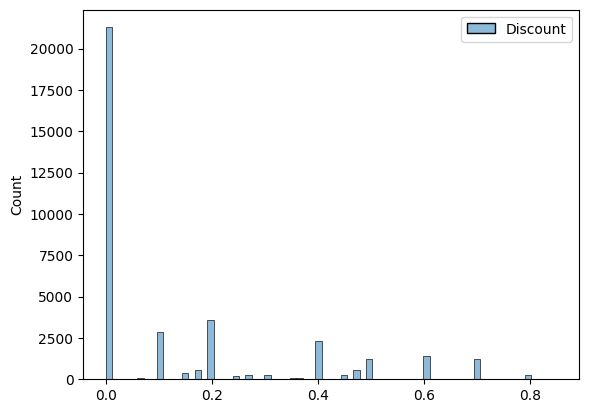

In [ ]:
discount_data = superstore.loc[superstore['Ship Mode'] == 'Standard Class',['Discount']]
sns.histplot(discount_data)

In [ ]:
discount_data.describe()

,Discount
count,36892.000000
mean,0.142496
std,0.212254
min,0.000000
25%,0.000000
50%,0.000000
75%,0.200000
max,0.850000


De 615550 pedidos, 36892 de ellos son realizados en el Ship Mode Standard Class, Dichos pedidos muestran descuentos bajos o nulo y algunos atipicos.
Podemos confirmar que los beneficios Profit obtenidos de estos pedidos no dependen de un alto descuento Discount

### Analisis por años

In [ ]:
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])

In [ ]:
menor_a = pd.to_datetime(superstore['Order Date']).dt.year.min() #2011

In [ ]:
mayor_a = pd.to_datetime(superstore['Order Date']).dt.year.max() #2014

In [ ]:
dataByYear = {} #diccionario que almacena dataframes por año
for anio in range(menor_a, mayor_a+1):
  dataByYear[anio] = superstore[ superstore['Order Date'].dt.year == anio]

#### Analisis de correlación por Año

<ipython-input-62-092aa6b15691>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataByYear[2011].corr(), vmin=-1, vmax=1, annot = True)


<Axes: >

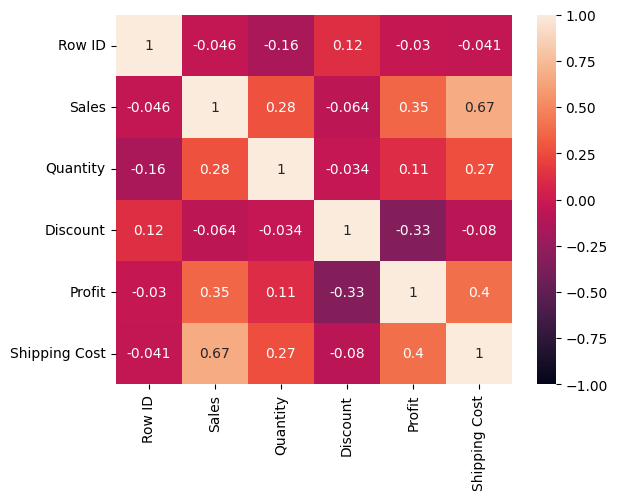

In [ ]:
sns.heatmap(dataByYear[2011].corr(), vmin=-1, vmax=1, annot = True)

<ipython-input-63-85aaec8b3a63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataByYear[2012].corr(), vmin=-1, vmax=1, annot = True)


<Axes: >

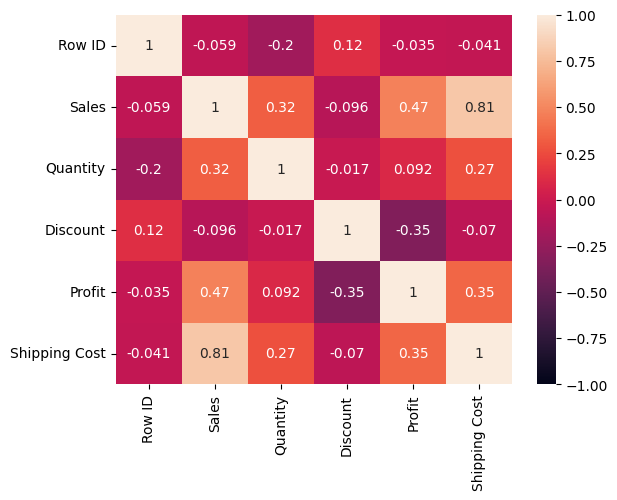

In [ ]:
sns.heatmap(dataByYear[2012].corr(), vmin=-1, vmax=1, annot = True)

<ipython-input-64-7c3ce8c10e9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataByYear[2013].corr(), vmin=-1, vmax=1, annot = True)


<Axes: >

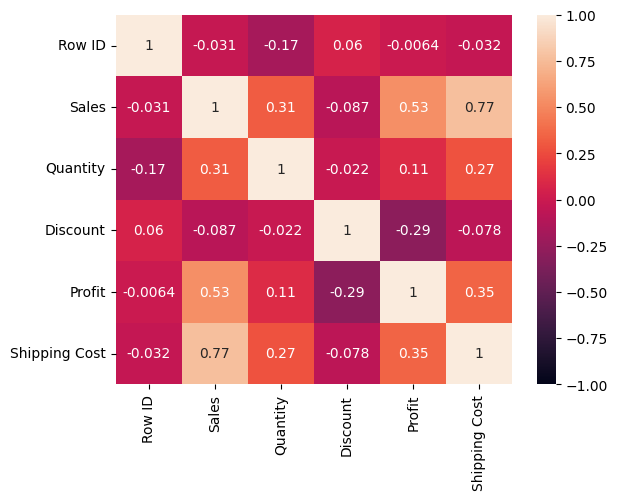

In [ ]:
sns.heatmap(dataByYear[2013].corr(), vmin=-1, vmax=1, annot = True)

<ipython-input-65-40db9c97d6d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataByYear[2014].corr(), vmin=-1, vmax=1, annot = True)


<Axes: >

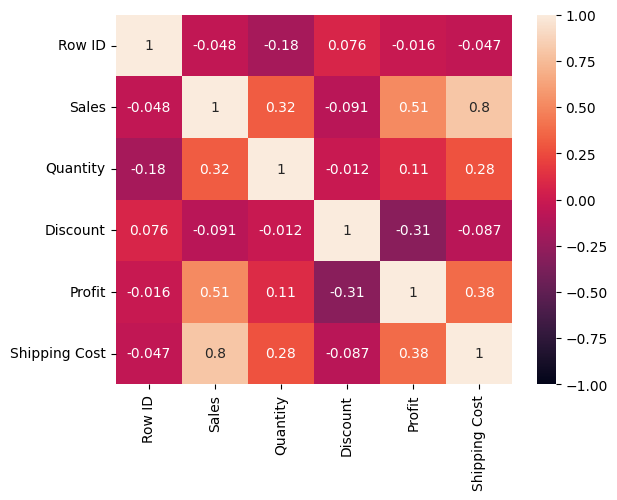

In [ ]:
sns.heatmap(dataByYear[2014].corr(), vmin=-1, vmax=1, annot = True)

Podemos notar que los pares de variables anteriormente mencionadas muestran una correlación significativa y casi constante durante los años que tenemos registrados en el dataset

#### Shipping Cost Analisis por año

In [ ]:
superstore.loc[superstore['Ship Mode'] == 'Standard Class', 'Shipping Cost'].describe()
#Shippin Cost 2011-2014

count    36892.000000
mean        20.105321
std         41.955368
min          0.000000
25%          2.180000
50%          6.360000
75%         19.610000
max        878.380000
Name: Shipping Cost, dtype: float64

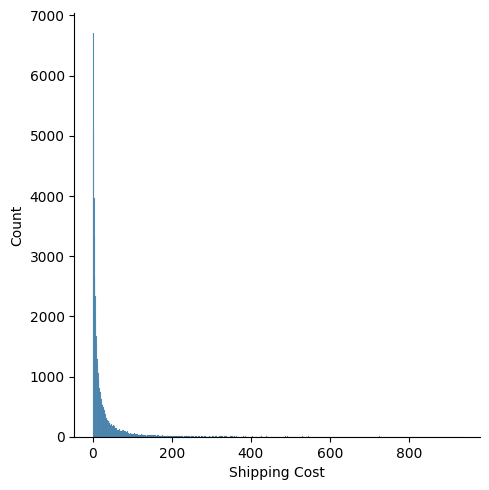

In [ ]:
sns.displot(superstore['Shipping Cost'])

Durante los 4 años de datos, podemos observar que los valores altos son atipicos, el 75% de los pedidos se enviaron por un costo inferior a &#36;19

In [ ]:
dataByYear[2011].loc[superstore['Ship Mode'] == 'Standard Class', 'Shipping Cost'].describe()

count    6370.000000
mean       20.770595
std        41.804920
min         0.020000
25%         2.172500
50%         6.670000
75%        20.157500
max       655.610000
Name: Shipping Cost, dtype: float64

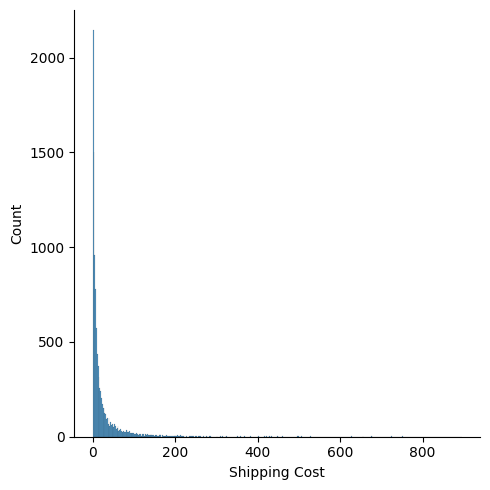

In [ ]:
sns.displot(dataByYear[2011]['Shipping Cost'])

In [ ]:
dataByYear[2012].loc[superstore['Ship Mode'] == 'Standard Class', 'Shipping Cost'].describe()

count    8135.000000
mean       19.811671
std        41.270080
min         0.000000
25%         2.320000
50%         6.450000
75%        19.150000
max       878.380000
Name: Shipping Cost, dtype: float64

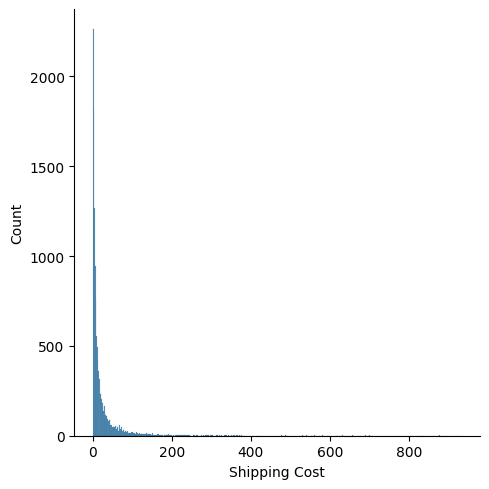

In [ ]:
sns.displot(dataByYear[2012]['Shipping Cost'])

In [ ]:
dataByYear[2013].loc[superstore['Ship Mode'] == 'Standard Class', 'Shipping Cost'].describe()

count    9894.000000
mean       19.740458
std        39.476344
min         0.040000
25%         2.132500
50%         6.335000
75%        19.800000
max       660.870000
Name: Shipping Cost, dtype: float64

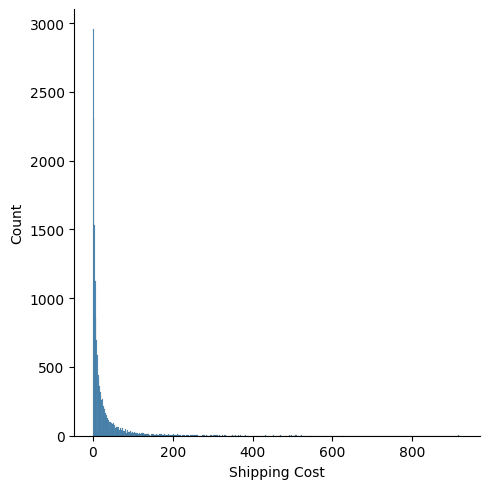

In [ ]:
sns.displot(dataByYear[2013]['Shipping Cost'])

In [ ]:
dataByYear[2014].loc[superstore['Ship Mode'] == 'Standard Class', 'Shipping Cost'].describe()

count    12493.000000
mean        20.246280
std         44.313668
min          0.010000
25%          2.140000
50%          6.170000
75%         19.440000
max        867.690000
Name: Shipping Cost, dtype: float64

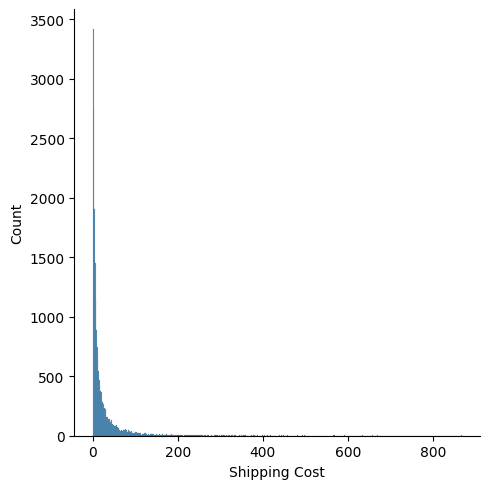

In [ ]:
sns.displot(dataByYear[2014]['Shipping Cost'])

Analizando año con año podemos notar que tambien el 75% de los pedidos se enviaron por un costo inferior a &#36;19

#### Sales Analisis por año

In [ ]:
salesByYear = {} # diccionario que almacena la suma de las ventas
for anio in range(menor_a, mayor_a+1):
  salesByYear[anio] = dataByYear[anio]['Sales'].sum()
salesByYear

{2011: 2705202.11256,
 2012: 3249509.39836,
 2013: 4107635.83338,
 2014: 5221941.7735}

In [ ]:
sales = pd.DataFrame.from_dict(salesByYear, orient = 'index', columns=['Sales'])
sales['Sales']=sales['Sales'].astype(int)
sales

,Sales
2011,2705202
2012,3249509
2013,4107635
2014,5221941


<Axes: ylabel='Sales'>

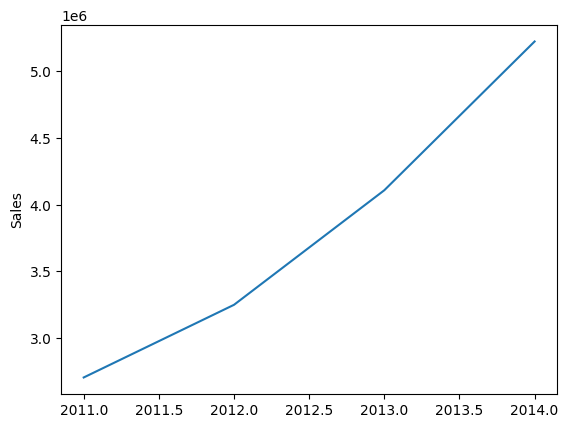

In [ ]:
sns.lineplot(sales, x=sales.index, y=sales['Sales'])

# CONCLUSION

El bajo costo Shipping Cost asociado con un pedido con el Ship Mode Standard Class y la Order Priority Medium crea una preferencia notable en el publico Market APAC;
Esta preferencia en las ventas Sales representa un beneficio en Profit, Teniendo en cuenta que el descuento Discount realizado en los pedidos es bajo o nulo Este no compromete los beneficios Profit

# PREGUNTAS Y RESPUESTAS

**-¿Hacia donde deberian ser orientadas las estrategias de Marketing para mantenener o mejorar la preferencia del mercado?**
En especifico al mercado de APAC o LATAM, ofreciendo un descuento que puede oscilar entre el 0% y 20% para los pedidos en Standard Class con prioridad Medium

**¿Que estrategias de descuento podrian ser implementadas?** Dada la información, el mercado busca reducir costos en sus pedidos, dado que los pedidos con bajos descuentos han resultado en un aumento en las ventas durante los 4 años, un descuento moderado entre 0% y 10% puede mantener y mejorar las ventas y el beneficio

**¿Deberian ser considerados cambios en la prioridad del pedido y costos relacionados con el Envio para maximizar los beneficios?**
El bajo costo en los envios debe mantenerse, pues ha demostrado tener un efecto en el crecimiento de las Ventas durante los 4 años